## Fikspunkt
**Eksempel 1**:

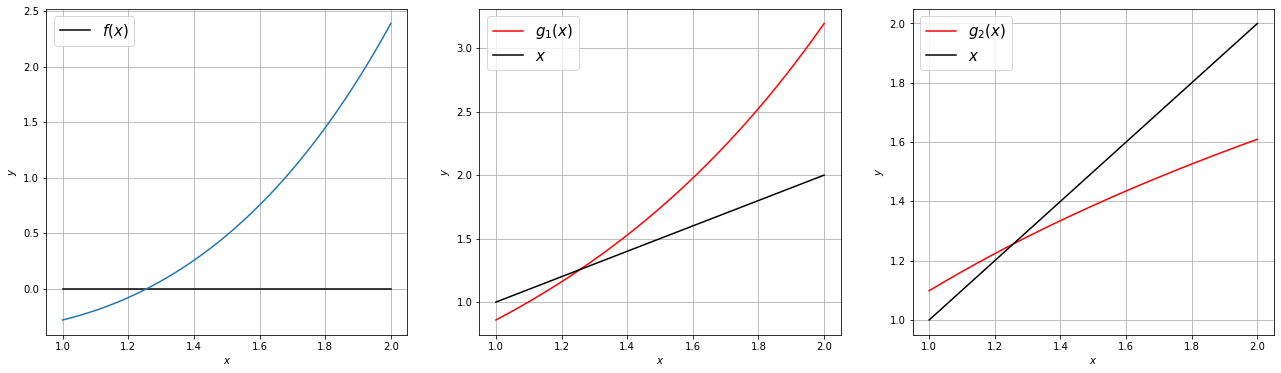

In [5]:
from matplotlib import pyplot as plt # importer plottefunksjonalitet
import numpy as np # importer matematiske funksjoner etc.
%matplotlib inline
params = {'legend.fontsize': 15}
plt.rcParams.update(params)

def f1(x):
    return np.exp(x)-2*x-1

def g1(x):
    return (np.exp(x)-1)/2

def g2(x):
    return np.log(1+2*x)

def g3(x):
    return ((x-1)*np.exp(x)+1)/(np.exp(x)-2)

x = np.linspace(1,2,301)

p1 = plt.figure(figsize=(22, 6))
plt.subplot(131)
plt.plot(x,0*x,'k')
plt.plot(x,f1(x))
plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel('$y$')
plt.legend(['$f(x)$'])

plt.subplot(132)
plt.plot(x,g1(x),'r')
plt.plot(x,x,'k')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$g_1(x)$','$x$'])

plt.subplot(133)
plt.plot(x,g2(x),'r')
plt.plot(x,x,'k')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$g_2(x)$','$x$'])

#p1.savefig('2_fikspunkt')

**Eksempel 2**:

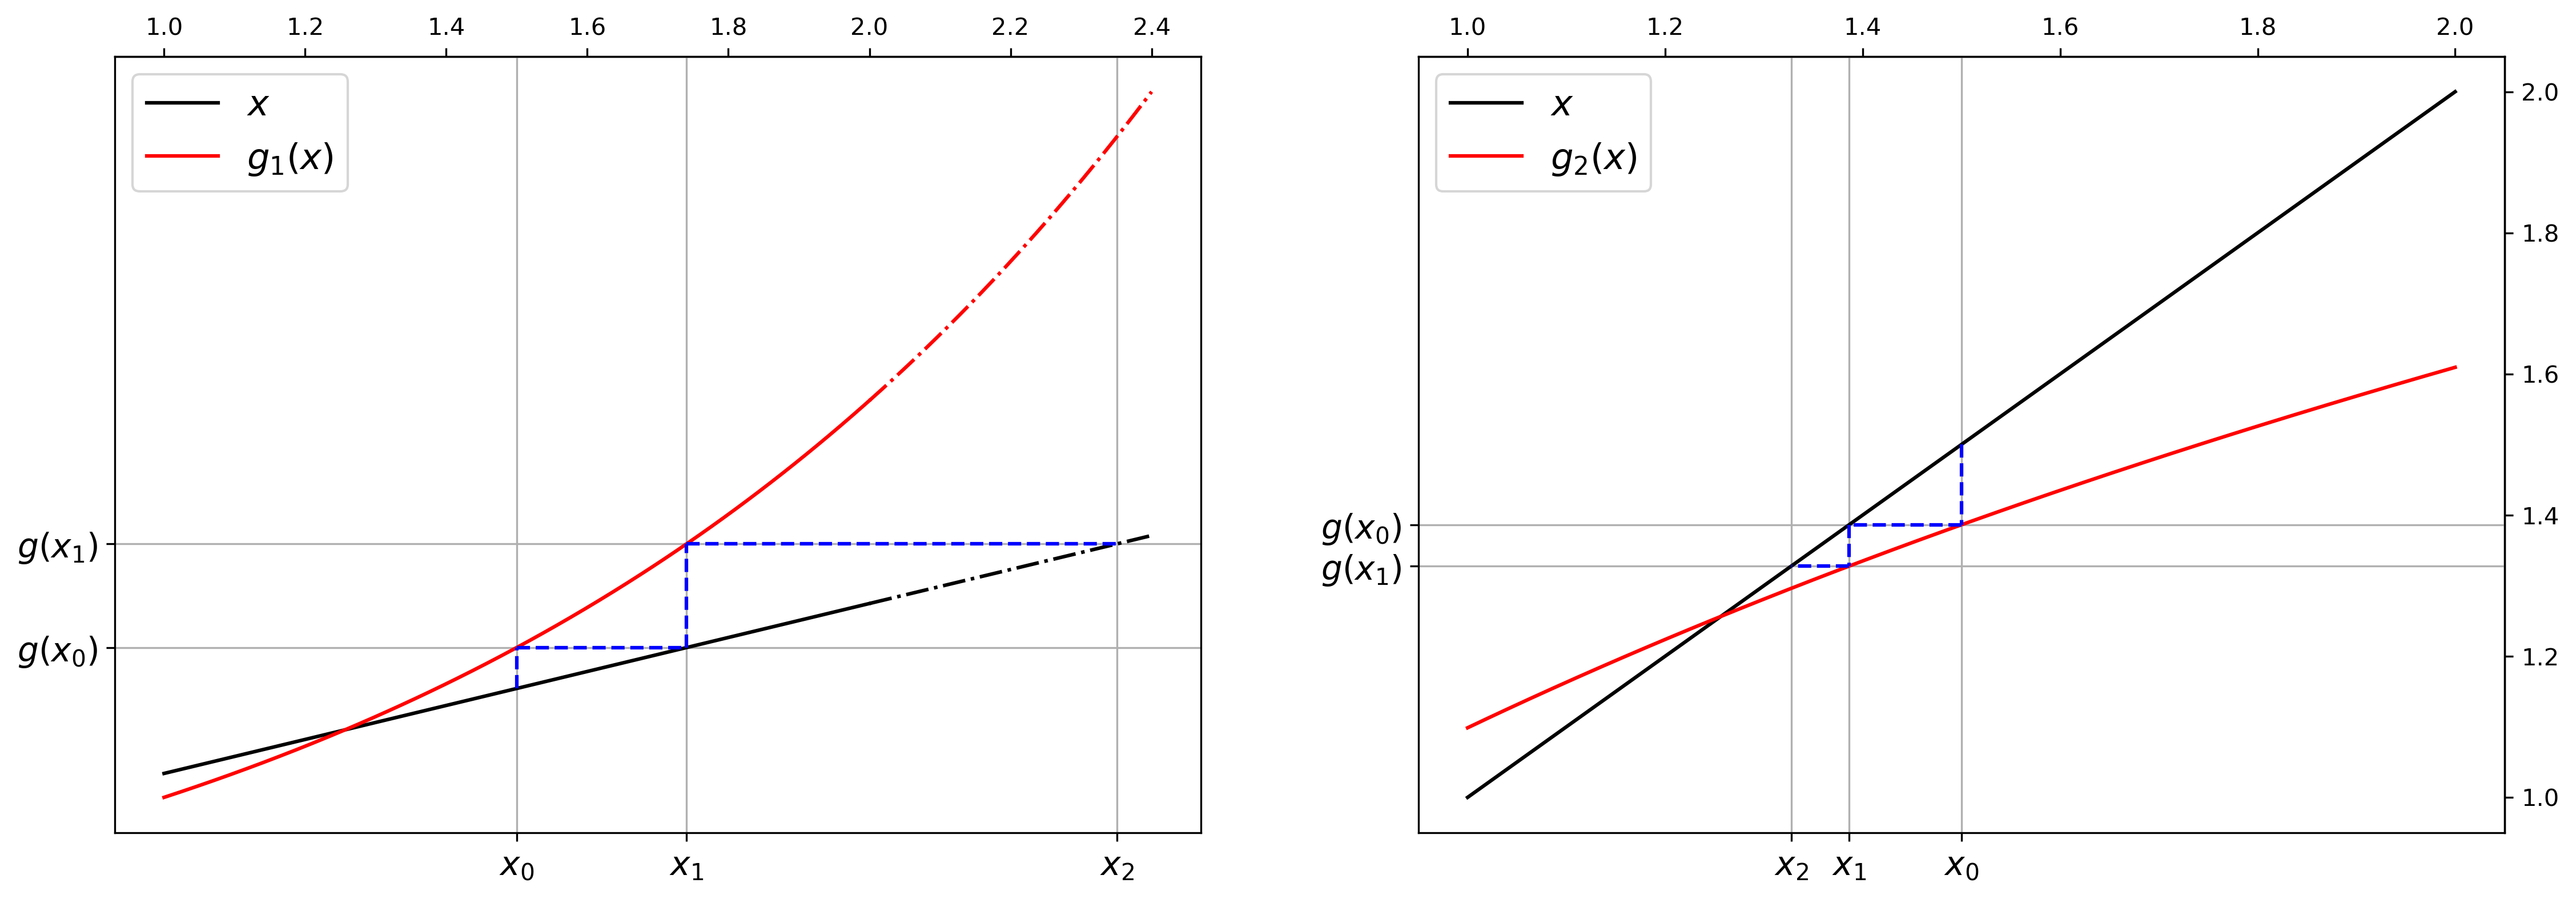

In [52]:
import matplotlib.animation as animation


init_guess = 1.5
N = 2
X1 = np.zeros(N+1)
X1[0] = init_guess
X2 = np.copy(X1)

for k in range(0,N):
    X1[k+1] = g1(X1[k])
    X2[k+1] = g2(X2[k])
      

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6),dpi=300)

# left plot

ax1.plot(x,x,'k')
ax1.plot(x,g1(x),'r')
ax1.plot(2+0.4*(x-1),2+0.4*(x-1),'k-.')
ax1.plot(2+0.4*(x-1),g1(2+0.4*(x-1)),'r-.')
#plt.xlabel('$x$')
#plt.ylabel('$y$')
ax1.set_xticks(X1)
ax1.set_xticklabels(['$x_0$','$x_1$','$x_2$'],size=14)
ax1.legend(['$x$','$g_1(x)$'])
ax1.secondary_xaxis('top')
ax1.grid(True)

ax1.set_yticks(g1(X1[:-1]))
ax1.set_yticklabels([r'$g(x_0)$','$g(x_1)$'],size=14)

for k in range(0,N):
    im = ax1.plot([X1[k],X1[k]],[X1[k],X1[k+1]],'b--',animated=True)
    im = ax1.plot([X1[k],X1[k+1]],[X1[k+1],X1[k+1]],'b--',animated=True)

# right plot    

ax2.plot(x,x,'k')
ax2.plot(x,g2(x),'r')
for k in range(0,N):
    ax2.plot([X2[k],X2[k]],[X2[k],X2[k+1]],'b--')
    ax2.plot([X2[k],X2[k+1]],[X2[k+1],X2[k+1]],'b--')
ax2.grid(True)
ax2.set_xticks(X2)
ax2.set_xticklabels(['$x_0$','$x_1$','$x_2$'],size=14)
ax2.legend(['$x$','$g_2(x)$'])
ax2.secondary_xaxis('top')

ax2.set_yticks(g2(X2[:-1]))
ax2.set_yticklabels([r'$g(x_0)$','$g(x_1)$'],size=14)
ax2.secondary_yaxis('right')

#fig.savefig('2_fiksiter1')

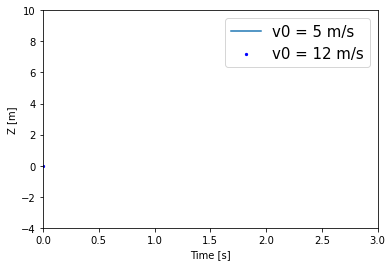

MovieWriter ffmpeg unavailable; using Pillow instead.


In [43]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    #scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


#ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

#ani.save("test2.gif")

**Eksempel 3**:


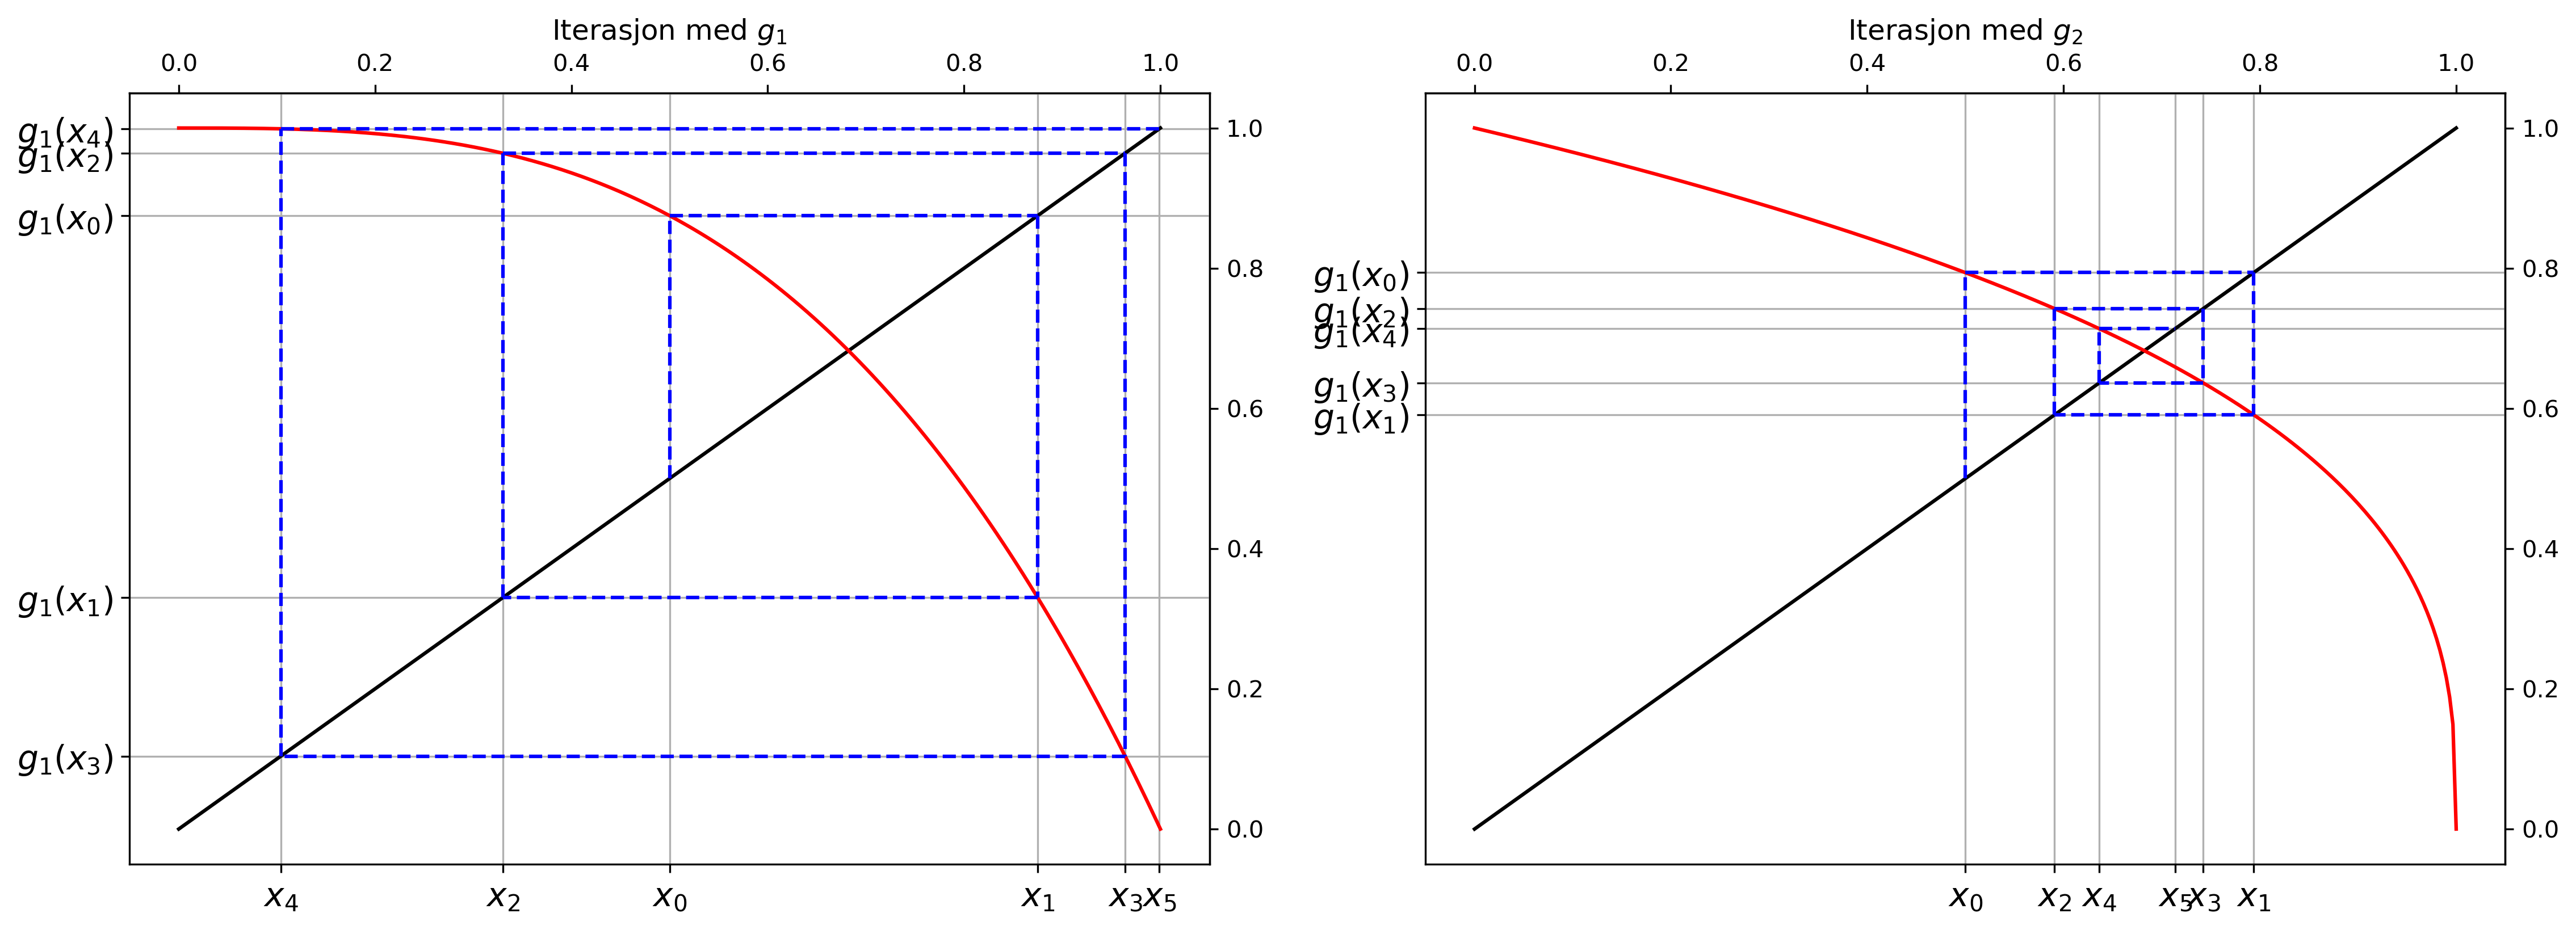

In [59]:
def f2(x):
    # f
    return x**3 + x -1

def g2(x):
    # g_1
    return 1 - x**3

def g3(x):
    # g_2
    return (1-x)**(1/3)

def fixpoint(g,x0,tol,maxIt):
    # implementasjon av fikspunktalgoritmen for en funksjon g,
    # startgjett x0, feiltoleranse tol and maksimalt antall iterasjoner maxIt.
    # Returnerer siste iterat, feilen and antall iterasjoner
    x_prev = x0
    x_next = g(x_prev)
    It = 1
    err = np.abs(x_next-x_prev)
    while err > tol and It < maxIt:
        x_prev = x_next
        x_next = g(x_next)
        err = np.abs(x_next-x_prev)
        It += 1
    return x_next, err, It

x0 = 0.5 # Startgjett, prøv å endre dette
N = 5 # Antall iterasjoner
X = np.zeros([2,N+1])
X[0,0] = x0
X[1,0] = x0

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(18,6),dpi=300)
ax3.plot(x-1,x-1,'k')
ax4.plot(x-1,x-1,'k')
ax3.plot(x-1,g2(x-1),'r')
ax4.plot(x-1,g3(x-1),'r')
ax3.grid(True)
ax4.grid(True)

for k in range(1,N+1):
    X[0,k] = fixpoint(g2,X[0,k-1],np.Inf,1)[0] # hent ut kun første verdi
    X[1,k] = fixpoint(g3,X[1,k-1],np.Inf,1)[0]
    
    ax3.plot([X[0,k-1],X[0,k-1]],[X[0,k-1],X[0,k]],'b--')
    ax3.plot([X[0,k-1],X[0,k]],[X[0,k],X[0,k]],'b--')
    
    ax4.plot([X[1,k-1],X[1,k-1]],[X[1,k-1],X[1,k]],'b--')
    ax4.plot([X[1,k-1],X[1,k]],[X[1,k],X[1,k]],'b--')

ax3.set_xticks(X[0,:])
ax3.set_yticks(g2(X[0,:-1]))
xlabels = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ylabels = ['$g_1(x_{:d})$'.format(k) for k in range(0,N)]
ax3.set_xticklabels(xlabels,size=14)
ax3.set_yticklabels(ylabels,size=14)
ax3.secondary_xaxis('top')
ax3.secondary_yaxis('right')
ax3.set_title('Iterasjon med $g_1$')

ax4.set_xticks(X[1,:])
ax4.set_xticklabels(xlabels,size=14)
ylabels = ['$g_1(x_{:d})$'.format(k) for k in range(0,N)]
ax4.set_yticks(g3(X[1,:-1]))
ax4.set_yticklabels(ylabels,size=14)
ax4.secondary_xaxis('top')
ax4.secondary_yaxis('right')
ax4.set_title('Iterasjon med $g_2$')

#fig.savefig('2_fiksspiral')

## Newton

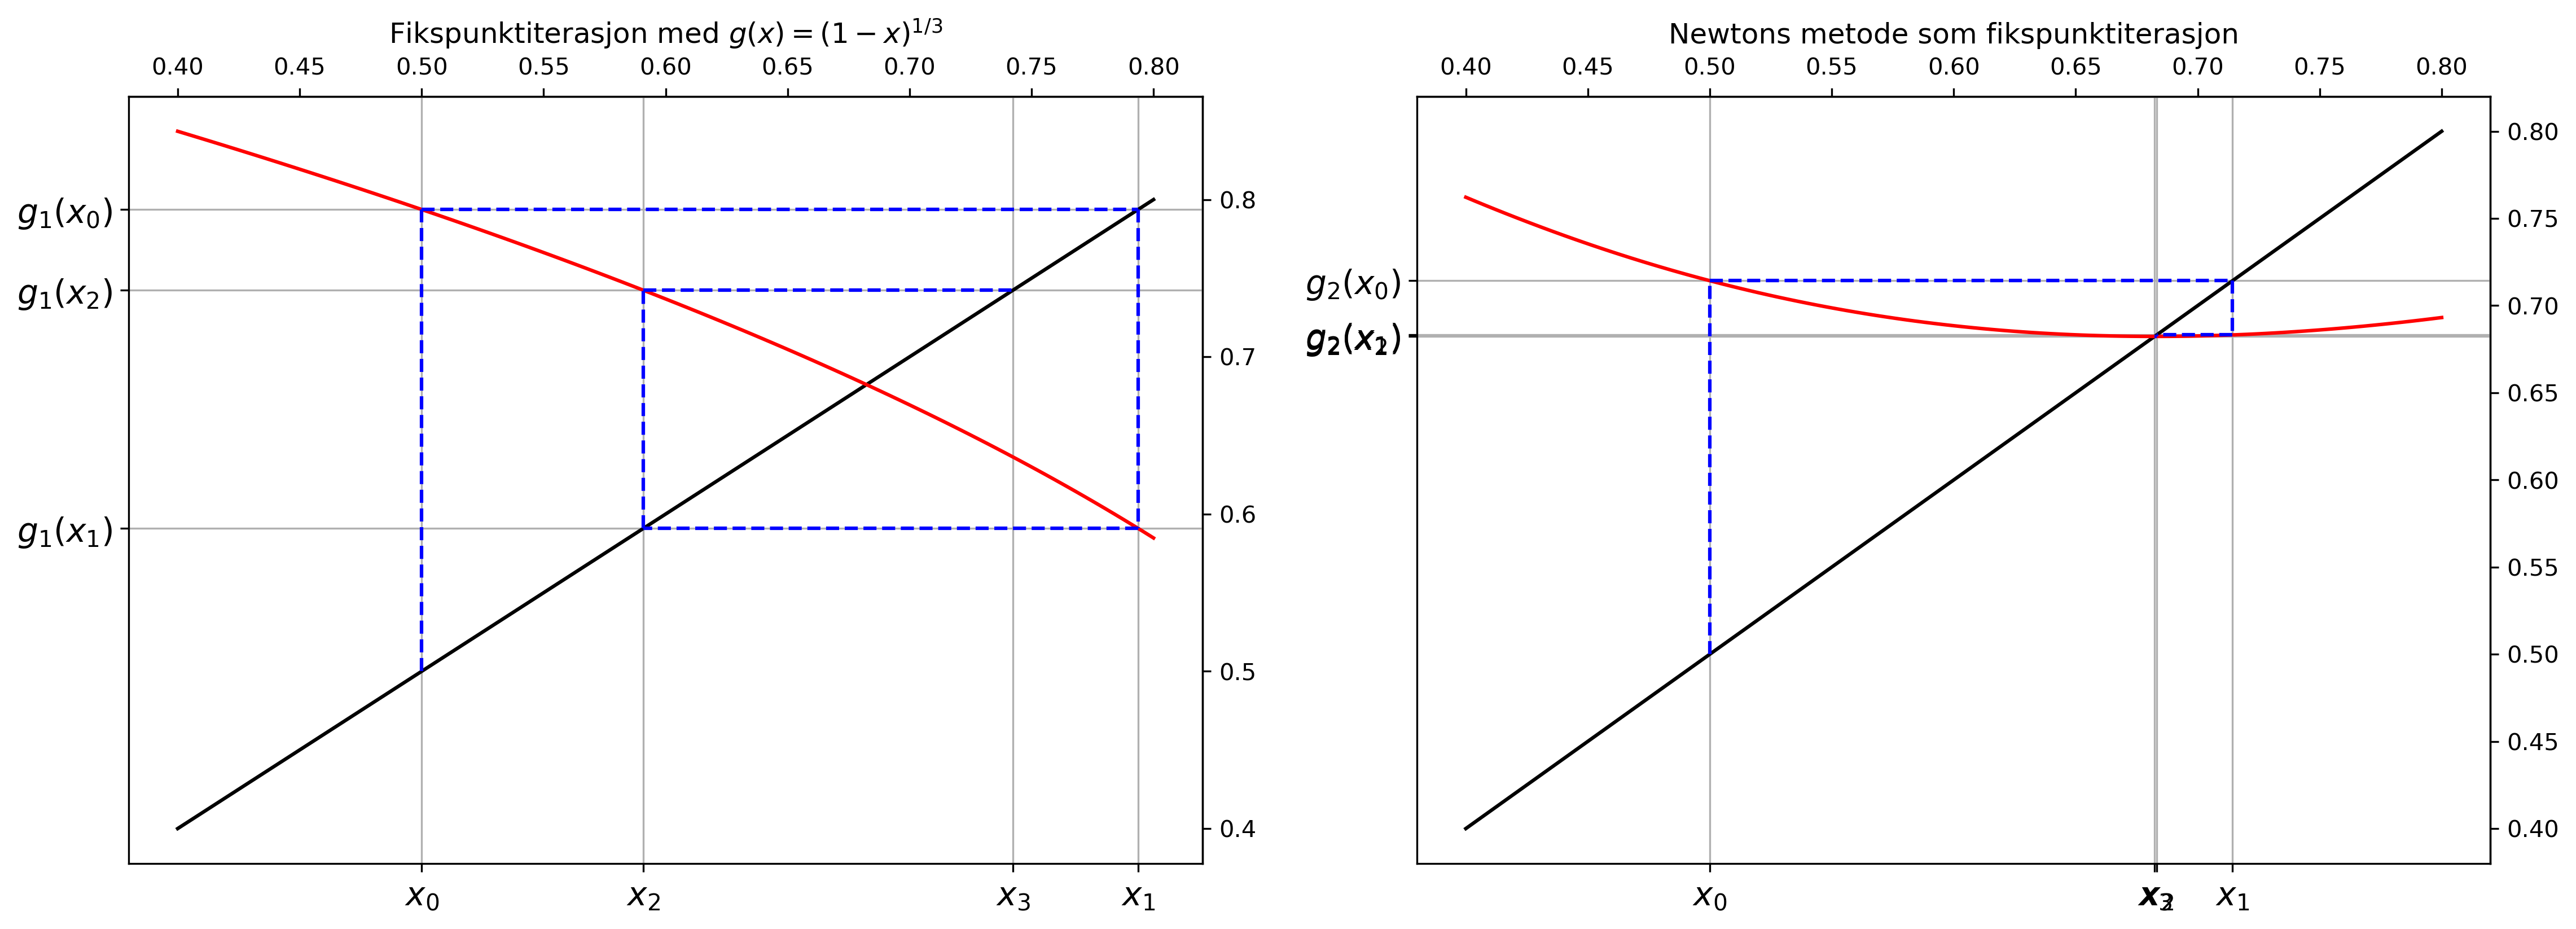

In [69]:
from matplotlib import pyplot as plt # importer plottefunksjonalitet
import numpy as np # importer matematiske funksjoner etc.
%matplotlib inline

def fixpoint(g,x0,tol,maxIt):
    # implementasjon av fikspunktalgoritmen for en funksjon g,
    # startgjett x0, feiltoleranse tol and maksimalt antall iterasjoner maxIt.
    # Returnerer siste iterat, feilen and antall iterasjoner
    x_prev = x0
    x_next = g(x_prev)
    It = 1
    err = np.abs(x_next-x_prev)
    while err > tol and It < maxIt:
        x_prev = x_next
        x_next = g(x_next)
        err = np.abs(x_next-x_prev)
        It += 1
    return x_next, err, It

def f1(x):
    return x**3 +x -1

def g1(x): # fikspunktiterasjonen fra tidligere eksempel
    return (1-x)**(1/3)

def g2(x): # Newtons metode
    return x - f1(x)/(1+3*x**2)

xs = np.linspace(0.4,0.8,101)

x0 = 0.5 # Startgjett, prøv å endre dette
N = 3 # Antall iterasjoner
X = np.zeros([2,N+1])
X[0,0] = x0
X[1,0] = x0

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6),dpi=300)
#fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(22,6))
ax1.plot(xs,xs,'k')
ax1.plot(xs,g1(xs),'r')
ax1.grid(True)

ax2.plot(xs,xs,'k')
ax2.plot(xs,g2(xs),'r')
ax2.grid(True)

#ax3.plot(xs,0*xs,'k')
#ax3.plot(xs,f1(xs),'b')
#ax3.grid(True)

for k in range(1,N+1):
    X[0,k] = fixpoint(g1,X[0,k-1],np.Inf,1)[0]
    X[1,k] = fixpoint(g2,X[1,k-1],np.Inf,1)[0]
    
    ax1.plot([X[0,k-1],X[0,k-1]],[X[0,k-1],X[0,k]],'b--')
    ax1.plot([X[0,k-1],X[0,k]],[X[0,k],X[0,k]],'b--')
    
    ax2.plot([X[1,k-1],X[1,k-1]],[X[1,k-1],X[1,k]],'b--')
    ax2.plot([X[1,k-1],X[1,k]],[X[1,k],X[1,k]],'b--')
    
    ax3.plot([X[1,k-1],X[1,k]],[f1(X[1,k-1]),0],'r--')
    #ax3.plot([X[1,k],X[1,k]],[0,f1(X[1,k])],'b--')

ax1.set_xticks(X[0,:])
xlabels = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ax1.set_xticklabels(xlabels,size=14)
ax1.set_yticks(g1(X[0,:-1]))
ylabels1 = ['$g_1(x_{:d})$'.format(k) for k in range(0,N)]
ax1.set_yticklabels(ylabels1,size=14)
ax1.secondary_xaxis('top')
ax1.secondary_yaxis('right')
ax1.set_title('Fikspunktiterasjon med $g(x) = (1-x)^{1/3}$')

ax2.set_xticks(X[1,:])
ax2.set_xticklabels(xlabels,size=14)
ax2.set_yticks(g2(X[1,:-1]))
ylabels2 = ['$g_2(x_{:d})$'.format(k) for k in range(0,N)]
ax2.set_yticklabels(ylabels2,size=14)
ax2.secondary_xaxis('top')
ax2.secondary_yaxis('right')
ax2.set_title('Newtons metode som fikspunktiterasjon')

#ax3.set_xticks(X[1,:])
#ax3.set_xticklabels(xlabels2)
#ax3.secondary_xaxis('top')
#ax3.set_title('Newtons metode ($f$ og tangentlinjer)')

#fig1.savefig('2_fixVSnewton')

array([0.69056878, 0.74688645, 0.70009939, 0.73067314, 0.70711365,
       0.72318094, 0.71124469, 0.71957655, 0.71349853])

0.7158713471616589

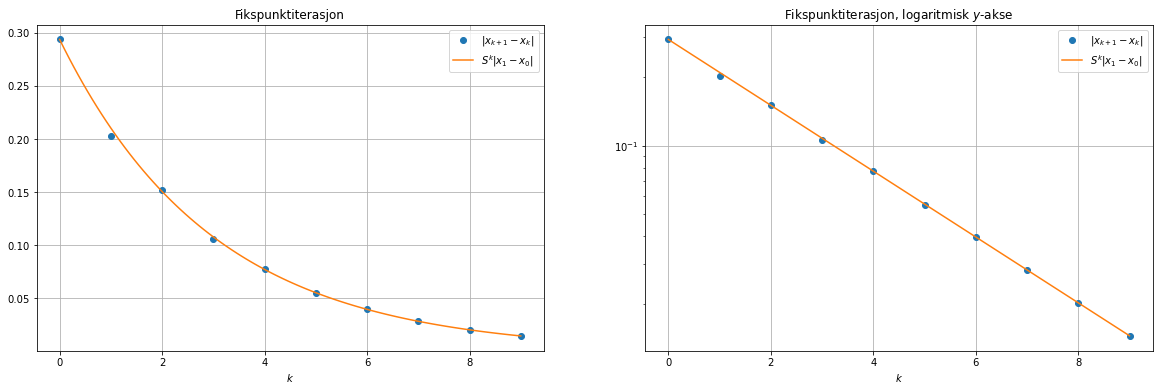

In [11]:
#r = (np.cbrt(3*np.sqrt(93)+27)-np.cbrt(3*np.sqrt(93)-27))*2**(2/3)/6 #bruke denne rota eller ikke?
N = 10 # >= 4

e = np.zeros([N,2])
xprev1 = x0
xprev2 = x0
for k in range(0,N):
    xprev1, e[k,0] = fixpoint(g1,xprev1,np.Inf,1)[0:2]
    xprev2, e[k,1] = fixpoint(g2,xprev2,np.Inf,1)[0:2]

display(e[1:N,0]/e[0:N-1,0])
S = np.average(e[1:N,0]/e[0:N-1,0])
display(S)
y1 = np.linspace(0,9,100)
fig2, (ax4,ax5) = plt.subplots(1,2,figsize=(20,6))
ax4.plot(e[:,0],'o')
ax4.plot(y1,e[0,0]*S**y1)
ax4.set_title('Fikspunktiterasjon')
ax4.legend(['$|x_{k+1}-x_{k}|$','$S^{k}|x_1-x_0|$'])
ax4.set_xlabel('$k$')
ax4.grid(True)

ax5.semilogy(e[:,0],'o')
ax5.plot(y1,e[0,0]*np.exp(y1*np.log(S)))
ax5.set_title('Fikspunktiterasjon, logaritmisk $y$-akse')
ax5.legend(['$|x_{k+1}-x_{k}|$','$S^{k}|x_1-x_0|$'])
ax5.set_xlabel('$k$')
ax5.grid(True)

#fig2.savefig('2_fikspunktrate')

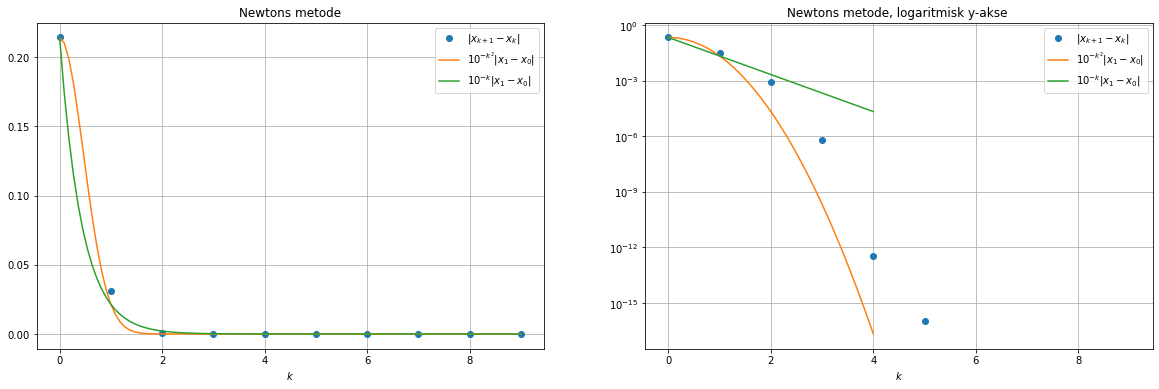

In [14]:
y2 = np.linspace(0,4,100)

fig3, (ax6,ax7) = plt.subplots(1,2,figsize=(20,6))
ax6.plot(e[:,1],'o')
ax6.plot(y1,e[0,1]*10**(-y1**2))
ax6.plot(y1,e[0,1]*10**(-y1))
ax6.set_title('Newtons metode')
ax6.legend(['$|x_{k+1}-x_{k}|$','$10^{-k^2}|x_1-x_0|$','$10^{-k}|x_1-x_0|$'])
ax6.set_xlabel('$k$')
ax6.grid(True)

ax7.semilogy(e[:,1],'o')
ax7.semilogy(y2,e[0,1]*10**(-y2**2))
ax7.semilogy(y2,e[0,1]*10**(-y2))
ax7.set_title('Newtons metode, logaritmisk y-akse ')
ax7.legend(['$|x_{k+1}-x_{k}|$','$10^{-k^2}|x_1-x_0|$','$10^{-k}|x_1-x_0|$'])
ax7.set_xlabel('$k$')
ax7.grid(True)

#fig3.savefig('2_newtonrate')